# Waffle Chart

A waffle chart shows progress towards a target or a completion percentage. There is a grid of small cells, of which coloured cells represent the data. A chart can consist of one category or several categories. Multiple waffle charts can be put together to show a comparison between different charts.

There are two main ways to create a waffle chart in python. These are either using the matplotlib library or by using pywaffle. Both of these methods are illustrated in this notebook. For visualization, the vaccination data of India has been used from the [WHO website.](https://covid19.who.int/region/searo/country/in'official)

#### ***1. Using Matplotlib***

Matplotlib is perhaps the most widely used visualization library in python. It can be used to create practically every visualization plot out there. This library was released for public usage in the year 2003. Since then there have been many new alternatives to matplotlib that have been created. One such alternative is the widely vused seaborn library that is created on top of matplotlub and was released sometime in 2012-2013.

In case of waffle charts, although one can create these using matplotlib as has been shown below, a new library called pywaffle has recently been introduced that reduces the complexity and length of code to a large extent. The usage of pywaffle is illustarted in the next section.

To start plotting a waffle chart in matplotlib we first import the pre-requisite libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

After importing all the relevant libraries, we create a dataframe that contains vaccination information.

In [27]:
df = pd.DataFrame({
    'Vaccination_Status': ['Not Vaccinated', 'First Dose Vaccinated', 'Second Dose Vaccinated'],
    'number': [1165675142, 130003225, 30414880] 
})

Following this, the total number of values, which in this case is the population of India and the propostion of the three vaccination type groups are computed.

In [28]:
total =1326093247
proportions = [(float(value) / total) for value in df['number']]

In the code cell below, the dimensions of the waffle chart to be created is fixed

In [29]:
width = 40
height=10
total= width * height

Here we calculate the number of tiles that will belong to each of the vaccination category in the final waffle chart

In [30]:
tiles_per_category = [round(proportion * total) for proportion in proportions]

A dummy matrix of zeroes is created and then a loop is run which assigns the vaccination categories (i.e. 0,1,2) to each of the indeces in the matrix to create a skeletal waffle chart.

In [31]:
waffle = np.zeros((height, width))
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle[row, col] = category_index

The use of matplotlib is done to convert the skeletal, matrix form waffle chart into a proper plot. Suitable color scheme is chosen and a legend is assigned for intuitive reading.

<Figure size 432x288 with 0 Axes>

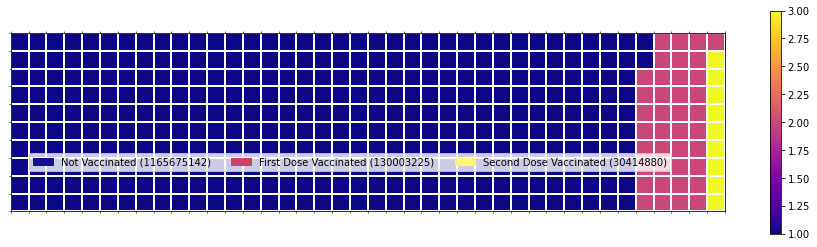

In [32]:
fig = plt.figure()
colormap = plt.cm.plasma
plt.matshow(waffle, cmap=colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
values = df['number']
categories = df['Vaccination_Status']
value_sign = ''
values_cumsum = np.cumsum(values)
total_values = values_cumsum[len(values_cumsum) - 1]
legend_handles = []
for i, category in enumerate(categories):
    if value_sign == '%':
        label_str = category + ' (' + str(values[i]) + value_sign + ')' 
    else:
        label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = [[0.074,0.057,0.589,1.0],[0.819, 0.247, 0.407, 1.0],[1.0, 0.956, 0.458, 1.0]]
    legend_handles.append(mpatches.Patch(color=color_val[i], label=label_str))
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0., 0.2, 0.95, 0.1)) #positioning legends
plt.colorbar()

And that's it! You have successfully created your first ever waffle chart. The function below is a combination of all the above code cells. The function create_waffle_chart() can be called with suitable arguments for any data frame to plot a waffle chart.

In [33]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.plasma
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

   # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = [[0.074,0.057,0.589,1.0],[0.819, 0.247, 0.407, 1.0],[1.0, 0.956, 0.458, 1.0]]
        legend_handles.append(mpatches.Patch(color=color_val[i], label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Defining the values for the function

In [34]:
width = 40 # width of chart
height = 10 # height of chart

categories = list(df['Vaccination_Status']) # categories
values = list(df['number']) # correponding values of categories

colormap = plt.cm.plasma# color map class

Calling the function

Total number of tiles is 400


<Figure size 432x288 with 0 Axes>

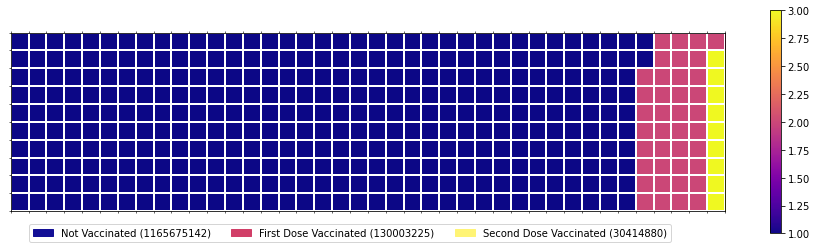

In [35]:
create_waffle_chart(categories, values, height, width, colormap)

And that's it for creating waffle charts with matplotlib. In the next section of this notebook, we try to create the same exact waffle chart as above using pywaffle instead.

#### ***1. Using PyWaffle***

Pywaffle makes the task of waffle chart creation much easier. In the case of matplotlib, the code was quite complex and at places very non-intuitive and time consuming. Let's face it, no-one wants to spend a ton of time creating a waffle they cannot eat! In such a situation, pywaffle comes to the rescue.

Before writing the actual code, we must first dowmload the library into the jupyter notebook as unlike in the case of matplotlib, this is not done by default. A combination of the pip tool with magic functions can be used to do so.

In [36]:
# dowloading the library
!pip install pywaffle
# importing the waffle module
from pywaffle import Waffle

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(df.number),
    labels=list(df.Vaccination_Status),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)}
)

And that's it. We have successfully created waffle charts using two different ways now! With this level of understanding of waffle charts, yopu can now pickup any data set of your own choice and go to town.